# Jet Tagging with Deep Neural Networks (DNN)

This notebook shows how to use a simple DNN for jet classification between QCD and TT jets using particle-level features.

## What is a DNN?
A Deep Neural Network (DNN) is a neural network with multiple hidden layers. Each layer transforms the input data to learn increasingly complex features.

## Why use DNNs for Jet Tagging?
- Can learn complex non-linear relationships
- Good at handling high-dimensional data
- Simpler to understand and quicker to train and run than alternatives like CNNs and GNNs

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from utils.data_processing import load_processed_data
from utils.plotting import plot_training_history, plot_confusion_matrix, plot_roc_curve

## 1. Load and Prepare Data

We'll use the same particle-level features as in the BDT notebook

In [2]:

X_train, y_train, train_ids, X_val, y_val, val_ids, X_test, test_ids= load_processed_data()

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 2. Build DNN Model

We'll create a simple DNN with:
- Input layer matching our feature dimension
- Multiple hidden layers with ReLU activation
- Dropout layers to prevent overfitting
- Output layer with sigmoid activation for binary classification

In [3]:
def build_dnn_model(input_dim):
    model = keras.Sequential([
        # Input layer
        # the number in these layers refers to the number of neurons in that layer, you can change this to whatever you want! 
        # but it is conventional to stick to powers of 2 because of resource optimisation 
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dropout(0.2),
        
        # Hidden layers
        # you can always change the number of layers 
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation='relu'),
        
        # Output layer
        # the final layer must have one as the output neuron since we have a binary classification 
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

# Create and compile model
model = build_dnn_model(X_train.shape[1])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-30 12:27:34.384605: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Train Model

We'll train the model with:
- Early stopping to prevent overfitting
- Validation split to monitor performance
- Batch size of 32 for stable training

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5784 - loss: 0.7131 - val_accuracy: 0.7429 - val_loss: 0.5286
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7200 - loss: 0.5363 - val_accuracy: 0.7528 - val_loss: 0.4715
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7654 - loss: 0.4686 - val_accuracy: 0.8253 - val_loss: 0.4072
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.4258 - val_accuracy: 0.8409 - val_loss: 0.3686
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8316 - loss: 0.3763 - val_accuracy: 0.8636 - val_loss: 0.3389
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8600 - loss: 0.3368 - val_accuracy: 0.8565 - val_loss: 0.3502
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8763 - loss: 0.3338 - val_accuracy: 0.8565 - val_loss: 0.3341
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8619 - loss: 0.3301 - val_accuracy: 0.8636 - val_loss:

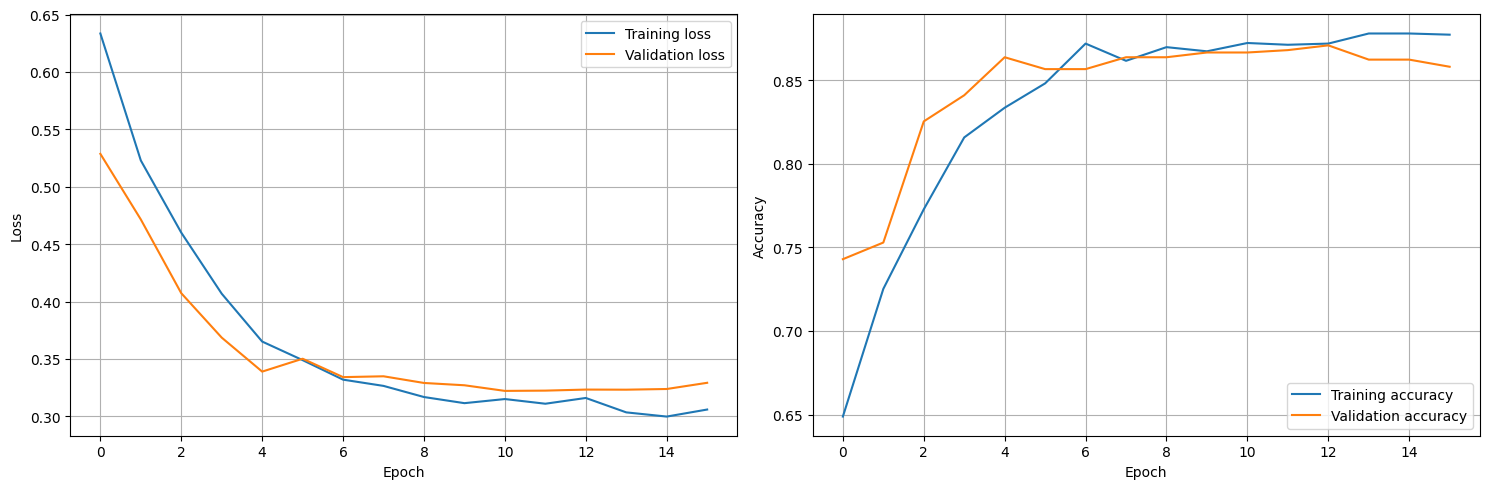

In [4]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=50, # how many times do we go through the full dataset
    batch_size=32, # how many data samples do we consider before updating our model 
    validation_split=0.2, # this uses another validation split, you can set this to 0 and train on the full data set and test on our validation set if you'd like 
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)

# Plot training history
plot_training_history(history)

## 4. Evaluate Model

Let's evaluate our model's performance on the test set.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8948 - loss: 0.2728  
Test Accuracy: 0.8944
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


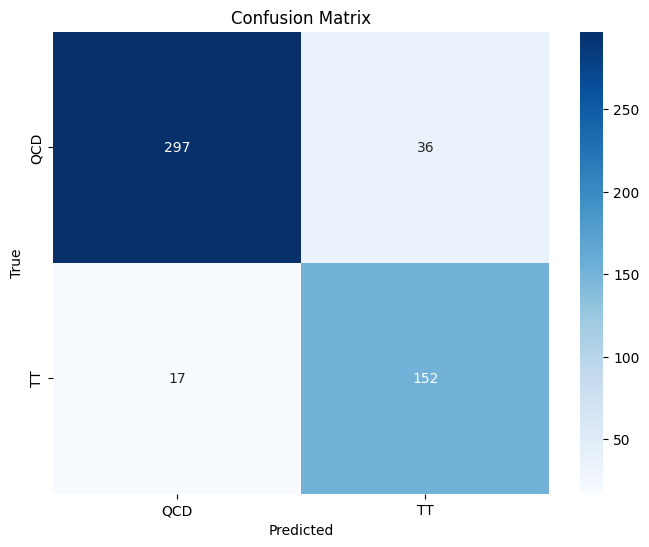

In [5]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred = (model.predict(X_val) > 0.5).astype(int)

# Plot confusion matrix
plot_confusion_matrix(y_val, y_pred)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


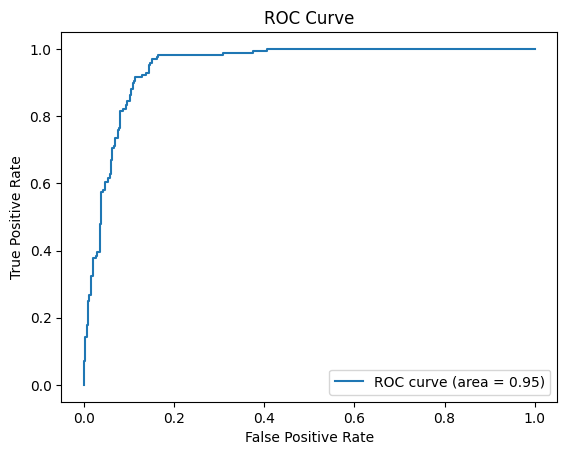

In [6]:
plot_roc_curve(y_val, model.predict(X_val))

# 5 - Make predictions

In [7]:
# test_predictions = model.predict(X_test)
# solution = pd.DataFrame({'id':test_ids, 'label':test_predictions[:,0]})
# solution.to_csv('submission.csv', index=False)